In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

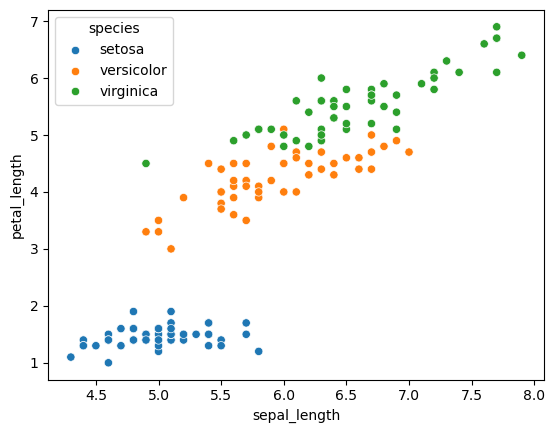

In [4]:
sns.scatterplot(data = iris_df, x= 'sepal_length', y= 'petal_length', hue = 'species')
plt.show()

In [5]:
# for our unsupervised learning section we'll assume no labels for this dataset and try to create a cluster and try to get the 3 cluster as there are 3 species here

numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
X  = iris_df[numeric_cols]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
## K-Means clustering
model = KMeans(n_clusters= 3, random_state= 67)


In [8]:
model.fit(X)

c:\Users\Kshitiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,67
,copy_x,True
,algorithm,'lloyd'


In [9]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

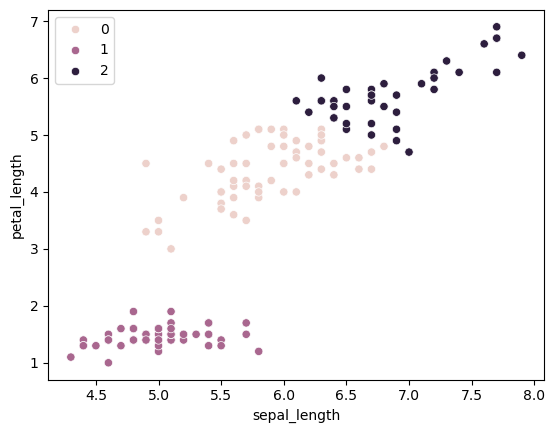

In [10]:
sns.scatterplot(data = X, x = 'sepal_length', y='petal_length', hue = preds)
plt.show()

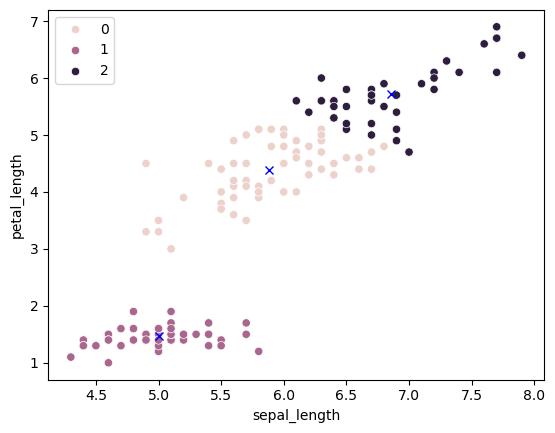

In [11]:
#To show the centroid for each of the clusters
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')
plt.show()

In [12]:
#Total Variance
model.inertia_

78.85566582597731

In [13]:
#Lets try 6 cluster
model = KMeans(n_clusters= 6, random_state= 67)
model.fit(X)
preds= model.predict(X)
preds

c:\Users\Kshitiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 1, 5, 1, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       0, 0, 4, 0, 3, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 3, 0, 4, 4, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 2, 3, 2, 3, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

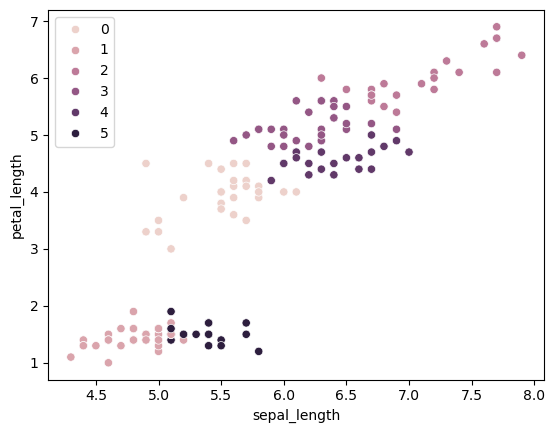

In [14]:
sns.scatterplot(data= X, x='sepal_length', y= 'petal_length', hue= preds)
plt.show()

c:\Users\Kshitiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kshitiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kshitiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Kshitiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

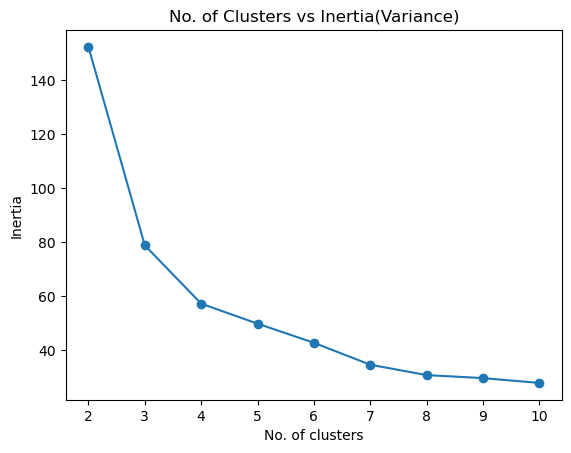

In [15]:
# To find the correct amount of the K, we create a plot between no. of cluster vs the inertia(variance)

options = range(2,11)
inertias = []

for n_clusters in options:
  model = KMeans(n_clusters, random_state=67).fit(X)
  inertias.append(model.inertia_)

plt.title('No. of Clusters vs Inertia(Variance)')
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
#DBSCAN clustering
model = DBSCAN(eps= 1.1, min_samples= 4)
model.fit(X)

,eps,1.1
,min_samples,4
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [17]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

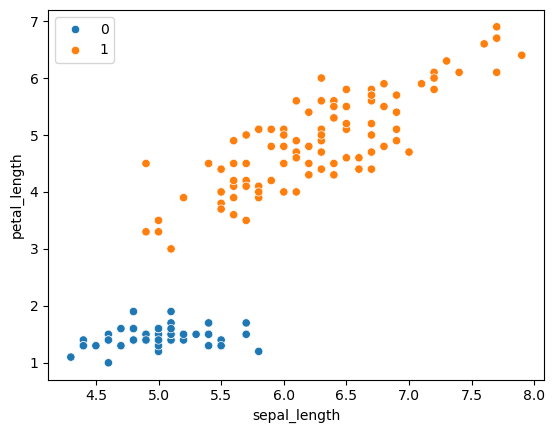

In [18]:
sns.scatterplot(data = X, x='sepal_length', y= 'petal_length', hue = model.labels_)
plt.show()

In [20]:
#Heirarchical Clustering


In [22]:
#Dimensionality Reduction
# 1. PCA(Principal Component Analysis)

pca = PCA(n_components= 2)

In [24]:
pca.fit(X)
pca

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [25]:
transformed = pca.transform(X)

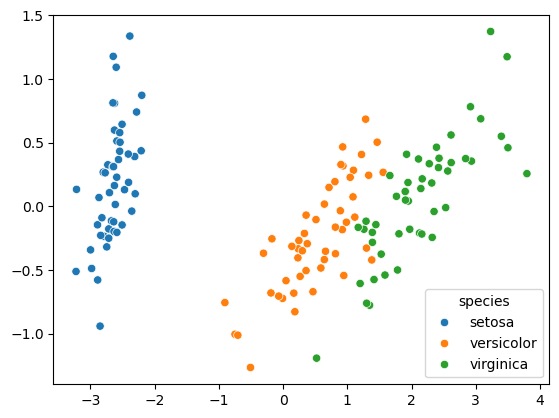

In [27]:
sns.scatterplot(data= X, x = transformed[:, 0], y= transformed[:, 1], hue = iris_df['species'])
plt.show()

In [29]:
#t-Distributed Stochastic Neighbor Embedding (t-SNE) [Mainfold Learning]

tsne = TSNE(n_components= 2)

In [32]:
transformed = tsne.fit_transform(X)

<Axes: >

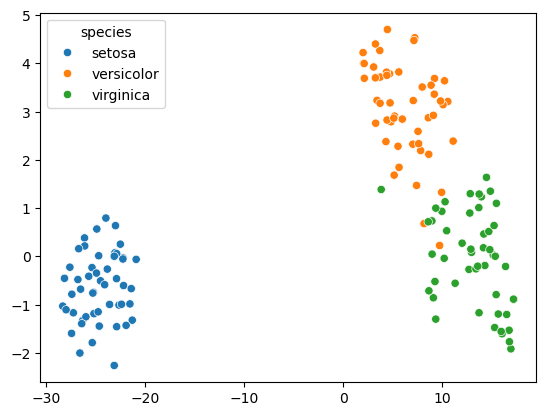

In [33]:
sns.scatterplot(x = transformed[:, 0], y= transformed[:,1], hue = iris_df['species'])